# Analysing a time series

To examine how the genetic diversity of the population changes over time, we need to make observations at multiple time points. 

* We construct a list (or a range) of observation times.  This is recorded in backwards time, so that observation time = 0 is the present or most recent generation in the population history. 
* We pass this to `get_coalescent` which launches a Markov chain simulation of coalescence times at each observation time point.
* When we run `get_diversity` it automatically calculates nucleotide diversity and haplotype homozygosity at each observation time point.
* We can use `plot_observations` to view the time series data

Thus if we specify 100 observation times, this will require 100 simulations, which will take much longer (typically several minutes for a population size of several thousands) than a single observation (typically several seconds).  

`get_diversity` starts with the earliest observation and proceeds to the most recent generation. The effective recombination parameter $\phi$ is updated with each observation, so that more recent generations are likely to have a more accurate estimate of $\phi$ than earlier observations.

In [ ]:
!pip install coalestr
from coalestr import cs

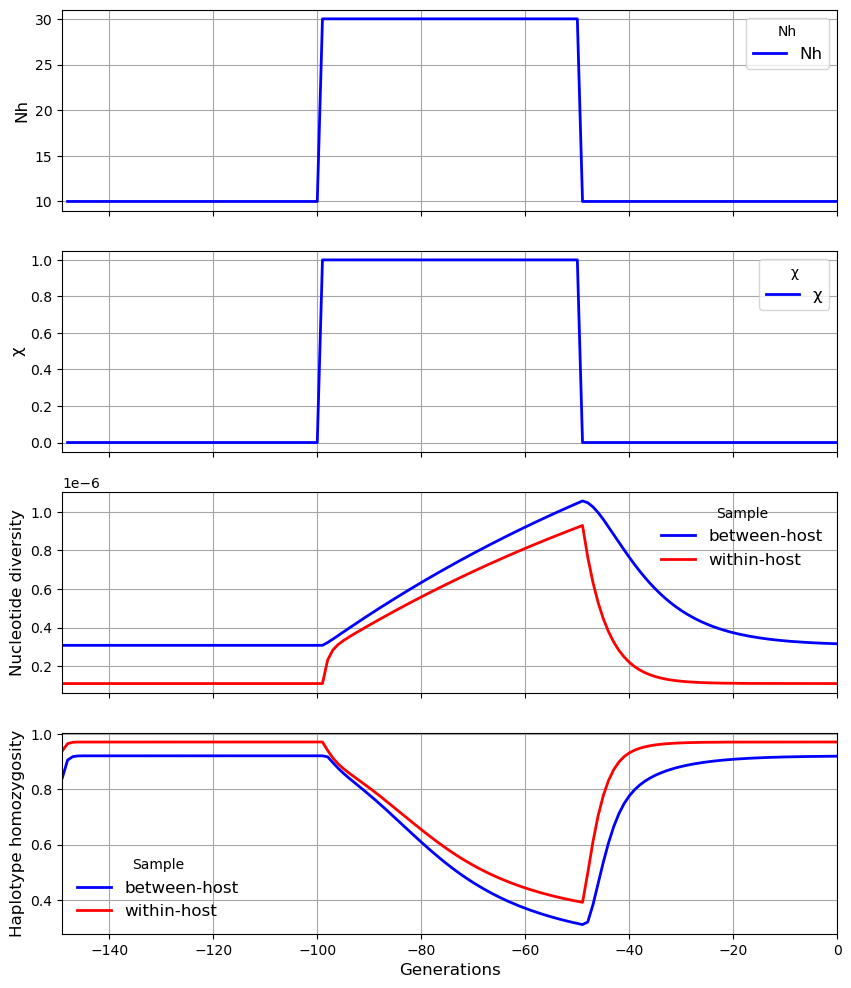

In [2]:
my_history = [[300, 10, 5, 0, 1],
              [50, 30, 5, 1, 1],
              [50, 10, 5, 0, 1]]

my_population = cs.Population(my_history)

# We specify observation times as a list or a range
my_observations = range(0, 150, 1)

# We pass the observation times to get_coalescent
my_population.get_coalescent(observe = my_observations, show = False)

# get_diversity automatically analyses each observation time
my_population.get_diversity(show = False)

# use plot_observations to view the time series data
my_population.plot_observations(metrics = ("N", "X", "snp_het", "hap_hom"))